In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
# Import file
file = "Resources/Mortality_Rate.txt"
df = pd.read_csv(file, encoding="ISO-8859-1", sep='\t')
display(df)

,Notes,Leading Cancer Sites,Leading Cancer Sites Code,State,State Code,Year,Year Code,Race,Race Code,Sex,Sex Code,Deaths,Population,Age-Adjusted Rate
0,NaN,Breast,26000.0,Alabama,1.0,2000.0,2000.0,Black or African American,2054-5,Female,F,166.0,627439.0,29.7
1,NaN,Breast,26000.0,Alabama,1.0,2000.0,2000.0,White,2106-3,Female,F,524.0,1643761.0,25.9
2,NaN,Breast,26000.0,Alabama,1.0,2001.0,2001.0,Black or African American,2054-5,Female,F,219.0,630901.0,38.7
3,NaN,Breast,26000.0,Alabama,1.0,2001.0,2001.0,White,2106-3,Female,F,528.0,1645541.0,25.8
4,NaN,Breast,26000.0,Alabama,1.0,2002.0,2002.0,Black or African American,2054-5,Female,F,167.0,633374.0,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,data set. Death rates may differ slightly from...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,"4. For the 2005 year, the Census Bureau estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,Texas due to Hurricanes Katrina and Rita. CDC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,"these states, nor are these counts included in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop all columns without any information
df_dropped = df.drop(columns=['Notes','Leading Cancer Sites Code','Year Code','Sex' ],axis=1)
df_dropped = df_dropped.dropna(how='any')
display(df_dropped)

,Leading Cancer Sites,State,State Code,Year,Race,Race Code,Sex Code,Deaths,Population,Age-Adjusted Rate
0,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,166.0,627439.0,29.7
1,Breast,Alabama,1.0,2000.0,White,2106-3,F,524.0,1643761.0,25.9
2,Breast,Alabama,1.0,2001.0,Black or African American,2054-5,F,219.0,630901.0,38.7
3,Breast,Alabama,1.0,2001.0,White,2106-3,F,528.0,1645541.0,25.8
4,Breast,Alabama,1.0,2002.0,Black or African American,2054-5,F,167.0,633374.0,29.2
...,...,...,...,...,...,...,...,...,...,...
1962,Breast,Wyoming,56.0,2014.0,White,2106-3,F,50.0,268767.0,14.1
1963,Breast,Wyoming,56.0,2015.0,White,2106-3,F,68.0,270054.0,19.7
1964,Breast,Wyoming,56.0,2016.0,White,2106-3,F,68.0,269349.0,20.0
1965,Breast,Wyoming,56.0,2017.0,White,2106-3,F,56.0,266963.0,16.5


In [4]:
df_no_other_race = df_dropped[df_dropped["Race"]!="Other Races and Unknown combined"]
df_no_other_race

,Leading Cancer Sites,State,State Code,Year,Race,Race Code,Sex Code,Deaths,Population,Age-Adjusted Rate
0,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,166.0,627439.0,29.7
1,Breast,Alabama,1.0,2000.0,White,2106-3,F,524.0,1643761.0,25.9
2,Breast,Alabama,1.0,2001.0,Black or African American,2054-5,F,219.0,630901.0,38.7
3,Breast,Alabama,1.0,2001.0,White,2106-3,F,528.0,1645541.0,25.8
4,Breast,Alabama,1.0,2002.0,Black or African American,2054-5,F,167.0,633374.0,29.2
...,...,...,...,...,...,...,...,...,...,...
1962,Breast,Wyoming,56.0,2014.0,White,2106-3,F,50.0,268767.0,14.1
1963,Breast,Wyoming,56.0,2015.0,White,2106-3,F,68.0,270054.0,19.7
1964,Breast,Wyoming,56.0,2016.0,White,2106-3,F,68.0,269349.0,20.0
1965,Breast,Wyoming,56.0,2017.0,White,2106-3,F,56.0,266963.0,16.5


In [5]:
df_clean = df_no_other_race[df_no_other_race["Sex Code"]!="M"]
df_clean

,Leading Cancer Sites,State,State Code,Year,Race,Race Code,Sex Code,Deaths,Population,Age-Adjusted Rate
0,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,166.0,627439.0,29.7
1,Breast,Alabama,1.0,2000.0,White,2106-3,F,524.0,1643761.0,25.9
2,Breast,Alabama,1.0,2001.0,Black or African American,2054-5,F,219.0,630901.0,38.7
3,Breast,Alabama,1.0,2001.0,White,2106-3,F,528.0,1645541.0,25.8
4,Breast,Alabama,1.0,2002.0,Black or African American,2054-5,F,167.0,633374.0,29.2
...,...,...,...,...,...,...,...,...,...,...
1962,Breast,Wyoming,56.0,2014.0,White,2106-3,F,50.0,268767.0,14.1
1963,Breast,Wyoming,56.0,2015.0,White,2106-3,F,68.0,270054.0,19.7
1964,Breast,Wyoming,56.0,2016.0,White,2106-3,F,68.0,269349.0,20.0
1965,Breast,Wyoming,56.0,2017.0,White,2106-3,F,56.0,266963.0,16.5


In [6]:
df_native_am = df_clean[df_clean["Race"]=="American Indian or Alaska Native"]
df_native_am

,Leading Cancer Sites,State,State Code,Year,Race,Race Code,Sex Code,Deaths,Population,Age-Adjusted Rate
54,Breast,Alaska,2.0,2016.0,American Indian or Alaska Native,1002-5,F,17.0,62903.0,36.8
66,Breast,Arizona,4.0,2004.0,American Indian or Alaska Native,1002-5,F,17.0,155546.0,15.9
73,Breast,Arizona,4.0,2007.0,American Indian or Alaska Native,1002-5,F,20.0,170621.0,17.6
87,Breast,Arizona,4.0,2013.0,American Indian or Alaska Native,1002-5,F,17.0,191266.0,11.7
92,Breast,Arizona,4.0,2015.0,American Indian or Alaska Native,1002-5,F,17.0,197520.0,10.9
95,Breast,Arizona,4.0,2016.0,American Indian or Alaska Native,1002-5,F,17.0,200937.0,11.4
99,Breast,Arizona,4.0,2017.0,American Indian or Alaska Native,1002-5,F,19.0,204022.0,12.4
156,Breast,California,6.0,2003.0,American Indian or Alaska Native,1002-5,F,22.0,265998.0,15.5
161,Breast,California,6.0,2004.0,American Indian or Alaska Native,1002-5,F,18.0,277479.0,10.7
166,Breast,California,6.0,2005.0,American Indian or Alaska Native,1002-5,F,18.0,289539.0,12.1


In [7]:
df_native_clean = df_native_am.drop(columns=['Leading Cancer Sites','State','State Code','Year', 'Race Code','Sex Code', 'Age-Adjusted Rate' ],axis=1)
df_native_clean

,Race,Deaths,Population
54,American Indian or Alaska Native,17.0,62903.0
66,American Indian or Alaska Native,17.0,155546.0
73,American Indian or Alaska Native,20.0,170621.0
87,American Indian or Alaska Native,17.0,191266.0
92,American Indian or Alaska Native,17.0,197520.0
95,American Indian or Alaska Native,17.0,200937.0
99,American Indian or Alaska Native,19.0,204022.0
156,American Indian or Alaska Native,22.0,265998.0
161,American Indian or Alaska Native,18.0,277479.0
166,American Indian or Alaska Native,18.0,289539.0


In [8]:
df_native_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 54 to 1883
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Race        42 non-null     object 
 1   Deaths      42 non-null     float64
 2   Population  42 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [9]:
df_native_clean.dtypes

Race           object
Deaths        float64
Population    float64
dtype: object

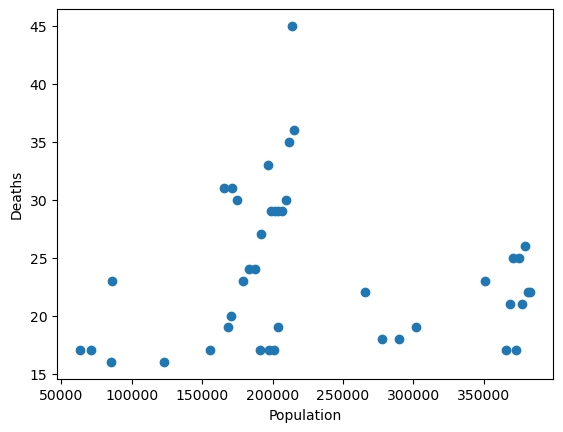

In [10]:
from pathlib import Path
plt.scatter(df_native_clean.Population, df_native_clean.Deaths)
plt.xlabel('Population')
plt.ylabel('Deaths')
plt.show()

In [11]:
X = df_native_clean.Population.values.reshape(-1, 1)

In [12]:
X.shape

(42, 1)

In [13]:
y = df_native_clean.Deaths

In [14]:
model = LinearRegression()

In [15]:
model.fit(X, y)

LinearRegression()

In [16]:
y_pred = model.predict(X)
print(y_pred.shape)

(42,)


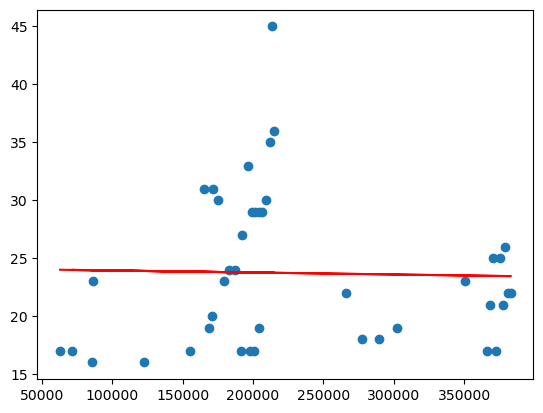

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [18]:
print(model.coef_)
print(model.intercept_)

[-1.71849477e-06]
24.110679978099057
